<a href="https://colab.research.google.com/github/vidyavijayanpillai/Food_Hub_Python_EDA/blob/main/PYF_Project_LearnerNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# mount the Google Drive to be able to read data sets from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
The Data Frame has 9 columns and 1898 rows. Data in each row corresponds to the order placed by a customer.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*   order_id, customer_id, food_preperation_time and delivery_time columns are of type integer (int64)
*   restaurant_name, cuisine_type, day_of_the_week and rating columns are of type string (object)
*   cost_of_order column is of type float (float64)





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check count of nulls in all columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
*   There are no null values in any of the columns

In [ ]:
# Find the unique values for "rating" column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# replacing missing values ("Not given") with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)

# changing the data type of rating to float
df['rating'] = df['rating'].astype(float)

df['rating'].value_counts(dropna=False)

NaN    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

#### Observations:
There were 736 occurances of 'Not given' in the rating column.They were replaced with Nan and the type of the column was converted to float, so that arithmetic operations can be performed on ther column.




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The minimum time for food preparation is 20 minutes, the average food preparation time is 27 minutes and the maximum time taken for food preparation is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#get the value counts including that for NaN
df['rating'].value_counts(dropna=False)

NaN    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

#### Observations:
There are 736 orders which are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.duplicated().sum()

0

#### Observations
There are no duplicate rows in the orders data set

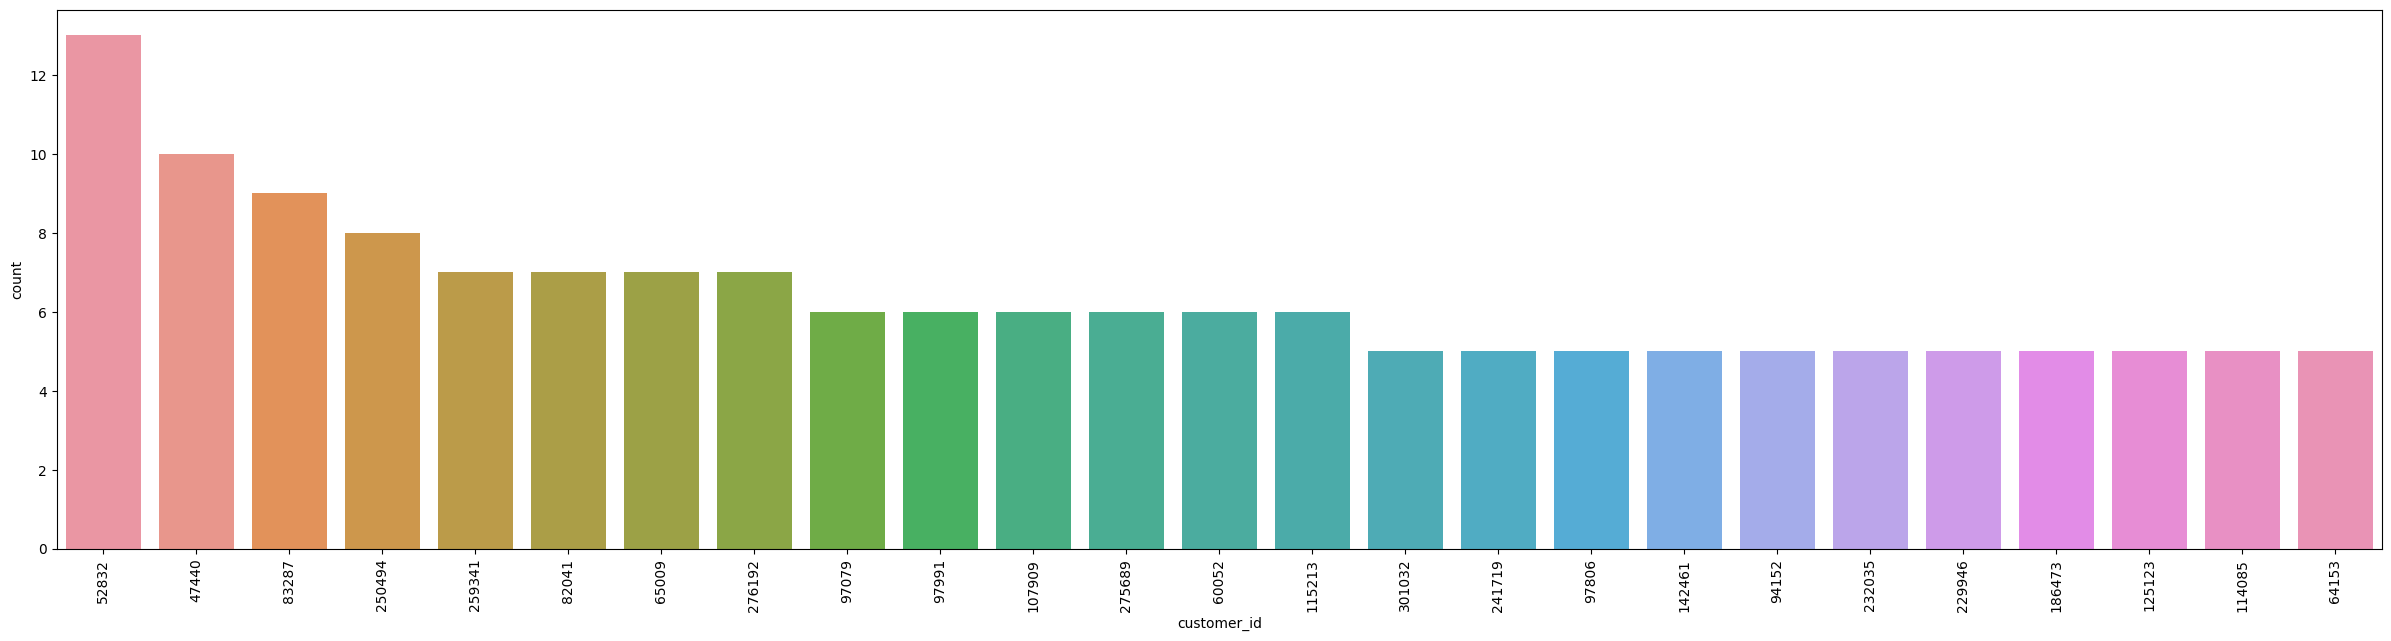

In [ ]:
# Count plot of customer_id (top 25 customers by order count)
plt.figure(figsize=(30,7))
# Reference: https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
# sort the countplot in the descreasing order of order counts and display the top 25
sns.countplot(data=df,x='customer_id', order=df.customer_id.value_counts().iloc[:25].index)
plt.xticks(rotation=90)
plt.show()

#### Observations
The above chart shows the countplot of top 25 coustomers by order count. The top 5 most frequent customers are 52832 (13 orders), 47440 (10 orders), 83287 (9 orders), 250494 (8 orders), 259341 (7 orders).

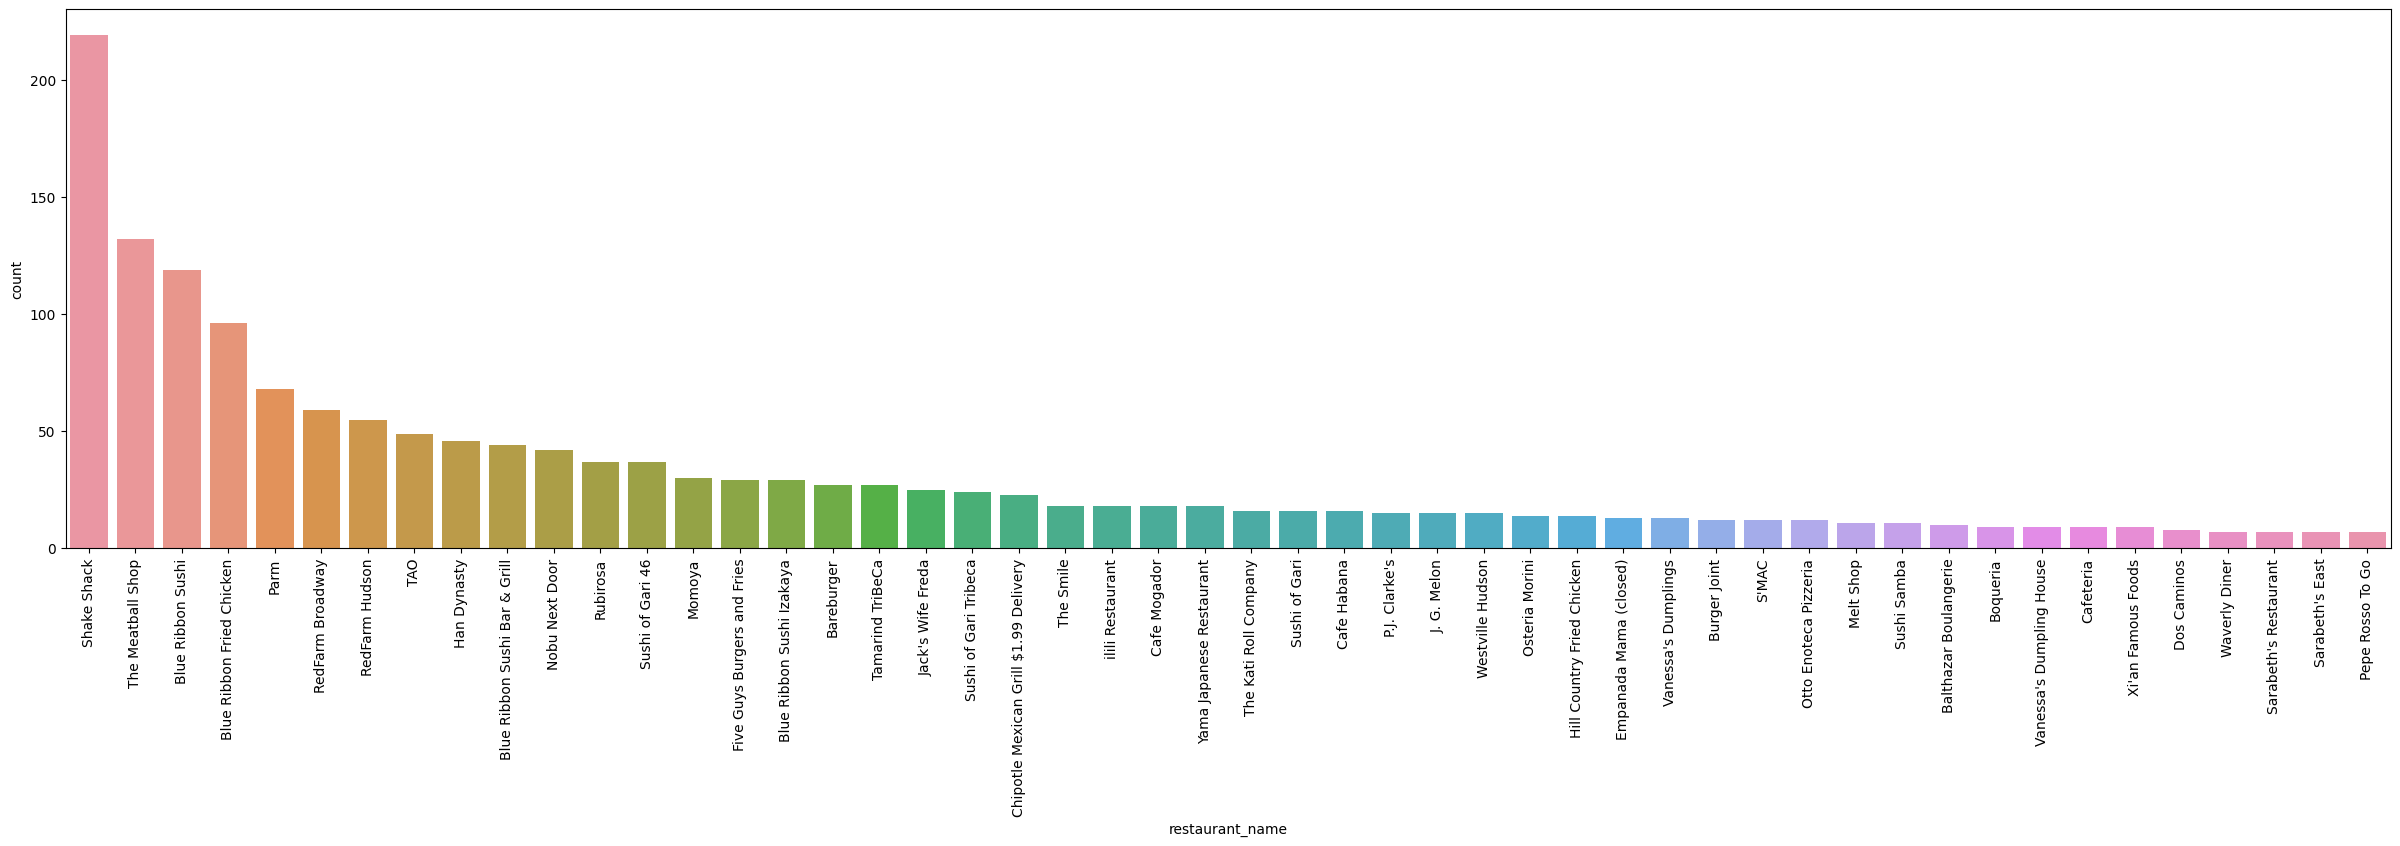

In [ ]:
# Count plot for 'restaurant_name' (top 50 restaurants by count of orders)
plt.figure(figsize=(30,7))
sns.countplot(data=df,x='restaurant_name', order=df.restaurant_name.value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.show()

#### Observations
The above chart shows the countplot of top 50 restaurants by order count. The top five restaurants are Shake Shack (219 orders), The Meatball Shop (132 orders), Blue Ribbon Sushi (119 orders), Blue Ribbon Fried Chicken (96 orders) and Parm (68 orders).

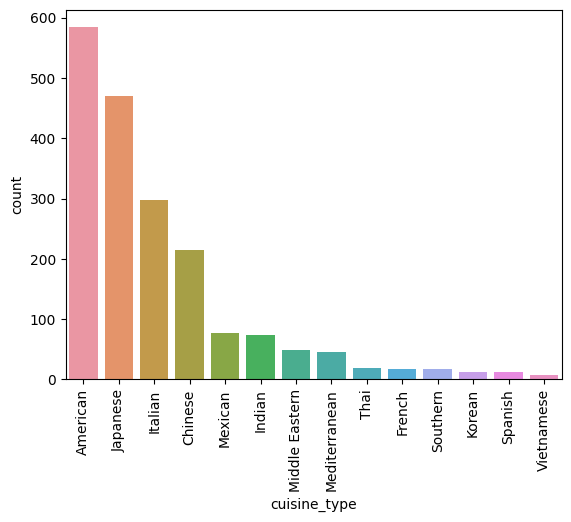

In [ ]:
# Count plot showing count of orders for each cuisine type
sns.countplot(data=df,x='cuisine_type', order=df.cuisine_type.value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Observations
The above chart is a count plot showing the count of orders for the 14 cuisine types. The most popular cuisne is "American", followed by "Japanese", "Italian" and 'Chinese'. The least popular cuisine types is 'Vietnamese'.

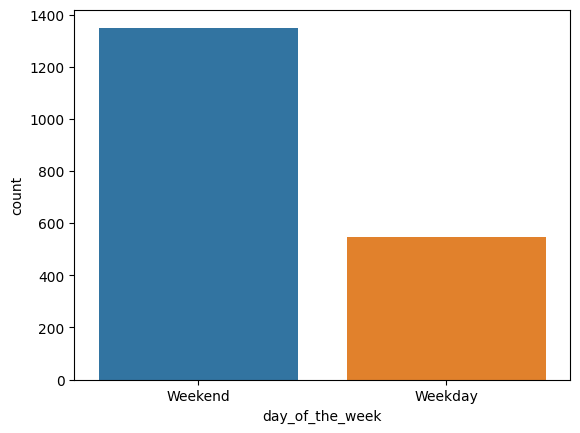

In [ ]:
# Count plot showing orders on weekdays versus weekends
sns.countplot(data=df,x='day_of_the_week')
plt.show()

#### Observations
The above countplots shows counts of orders on weekends and weekdays. The counts of corders placed on weekdays is less than half of that placed on weekends.

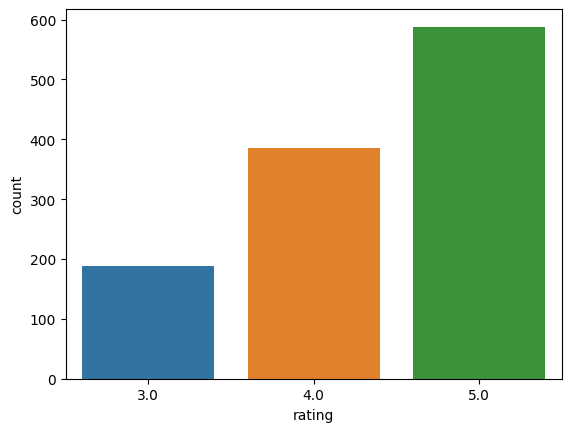

In [ ]:
# Count plot showing count of orders by rating
sns.countplot(data=df,x='rating')
plt.show()

#### Observations
The above coutplot displays the count of orders for each 'rating' category. Of the oders for which ratings are known, there are no orders with a rating less than 3. Rating 5 has the highest number of orders (588 orders) followed by rating 4 (386 orders) and rating 3 (188 orders).

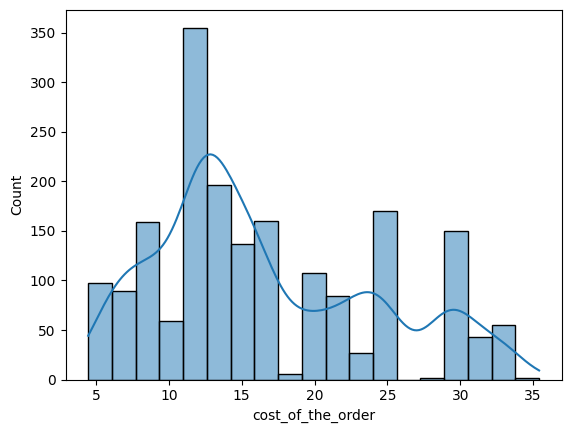

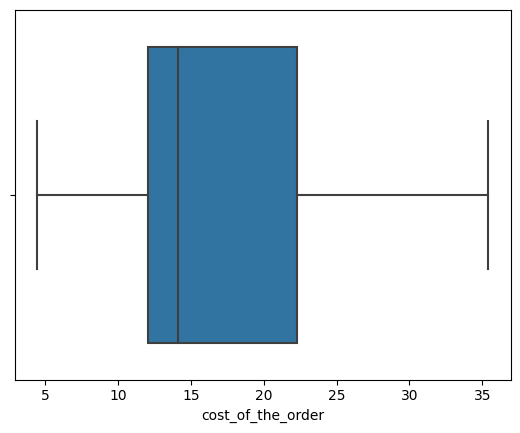

In [ ]:
# Histogram plot and box plot for distribution of cost_of_the_order
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

#### Observations
The above graphs show the distribution of cost_of_the_order using histogram and box plot. The minimum cost of an order is close to 5 dollars and maximum is 35 dollars. The average cost of an order is close to 12 dollars. The box plot shows that the distribution is slighlty right skewed.

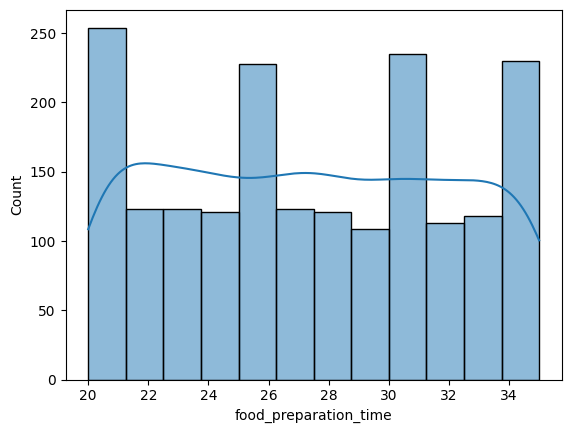

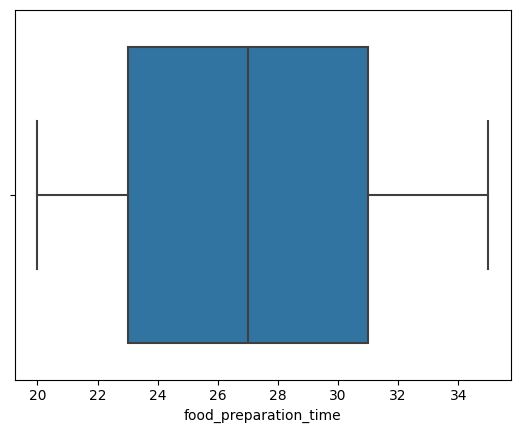

In [ ]:
# Histogram plot and box plot for distribution of food_preparation_time
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

#### Observations:
The above graphs show the distribution of food_preparation_time using histogram and box plot. The minimum food preparation time is 20 minutes and the maximum is 35 minutes. The median food preparation time is 27 minutes

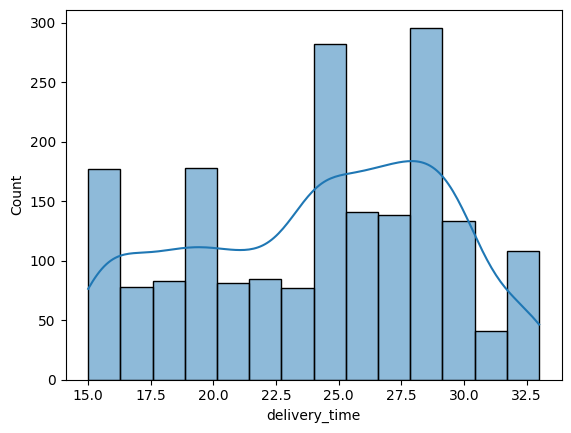

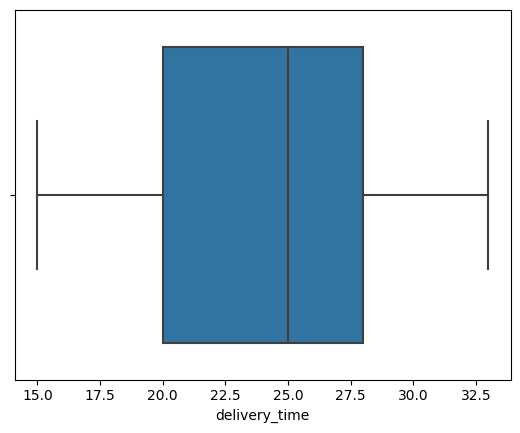

In [ ]:
# Histogram plot and box plot for distribution of delivery_time
sns.histplot(data=df, x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

#### Obeservations:
The above graphs show the distribution of delivery_time using histogram and box plot. The minimum delivery time is 15 minutes and the maximum is 33 minutes. The median food preparation time is 25 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# find the value counts of restaurants
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The top five restaurants are Shake Shack (219 orders),The Meatball Shop (132 orders), Blue Ribbon Sushi (119 orders), Blue Ribbon Fried Chicken (96 orders) and Parm (68 orders).

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# filter the data set to orders on the weekend and then get the value counts for cuisine type
df[(df['day_of_the_week']=='Weekend')]['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
"American" is the most popular cusine on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# find the count of orders that cost more than 20 dollars and then calculate the percentage
(df[(df['cost_of_the_order']>20)].shape[0]/df.shape[0]) * 100

29.24130663856691

#### Observations:
29.24 percentage of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# find the mean of delivery_time
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# find the value counts of customer_id
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
The 5 most frequest customers and the number of orders they placed are as follows:
*   52832 - 13 orders
*   47440 - 10 orders
*   83287 - 9 orders
*   250494 - 8 orders
*   259341 - 7 orders








### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-26-d454e15422c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


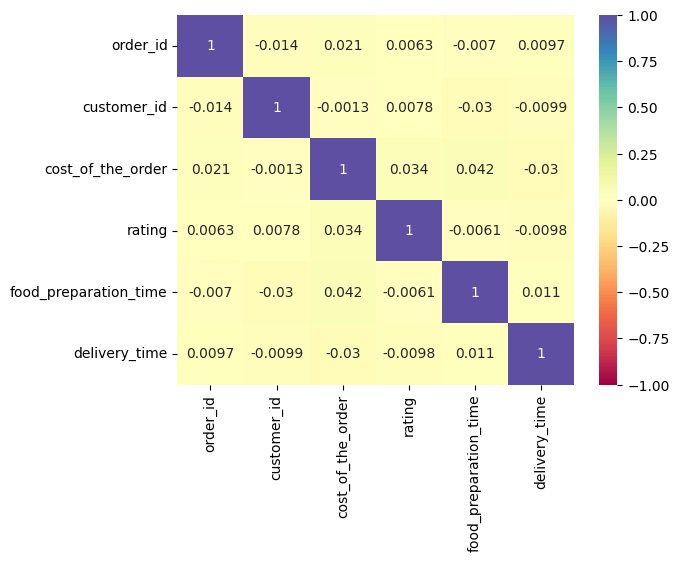

In [ ]:
# plot a heatmap showing coorrelation between the numerical columns
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations
The low values of correlation coefficients in the matrix shows that there is no significant (negative or positive) correlation between any of the numeric variables.

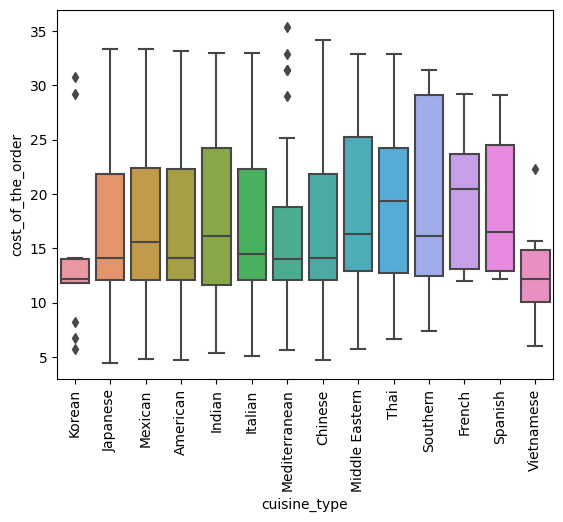

In [ ]:
# box plot of cost_of_the_order for the different cuisine types
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

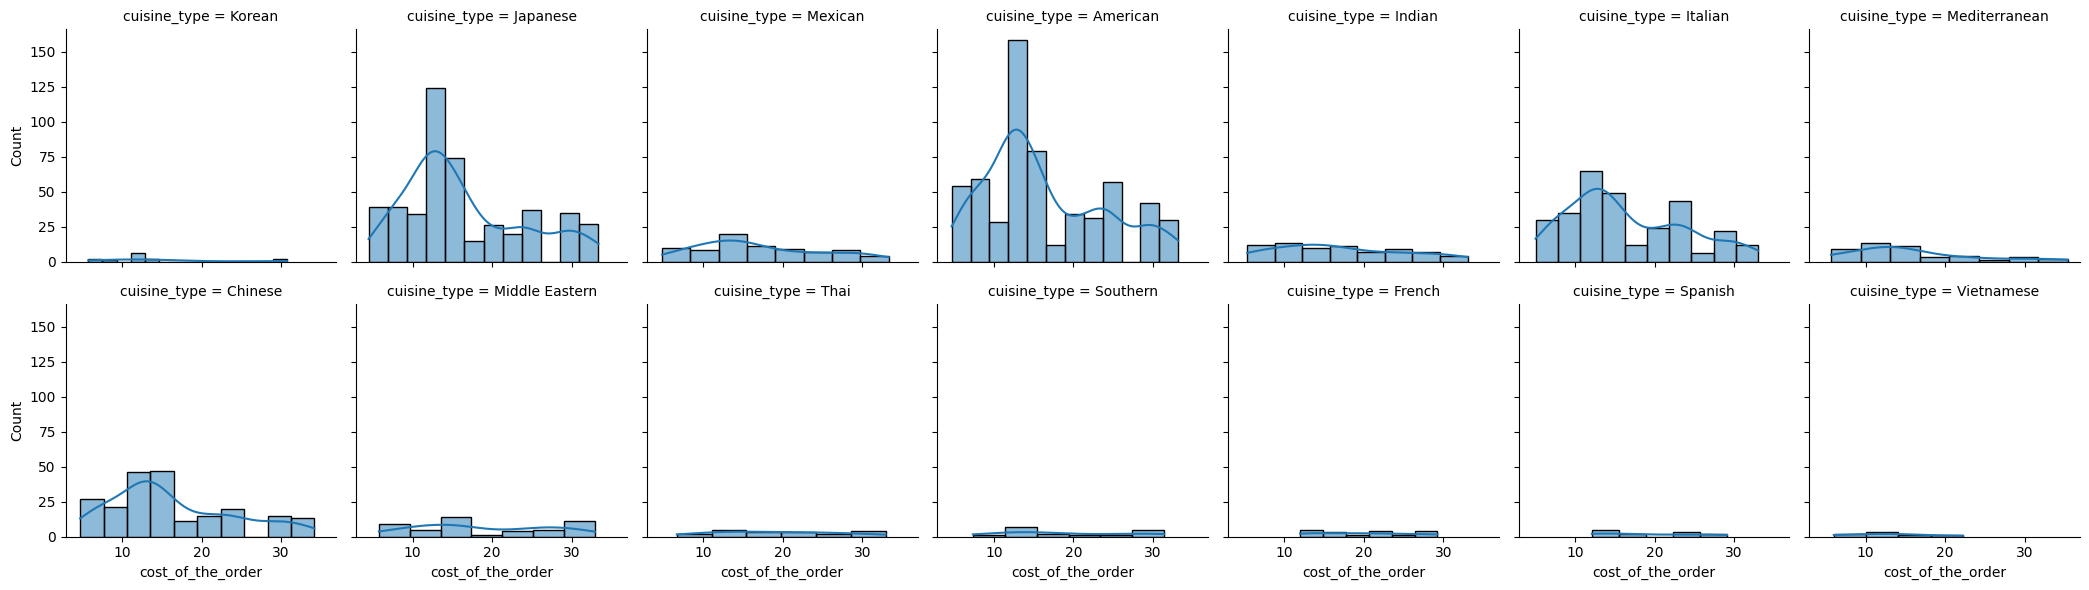

In [ ]:
# histogram of cost_of_the_order for the different cuisine types
g = sns.FacetGrid(df, col="cuisine_type", col_wrap=7)
g.map(sns.histplot, "cost_of_the_order", kde=True);
plt.show()

#### Observations
*   The shape of the distribution curve for cost_of_the_order does not change significantly for the different cuisine types which implies that cuisine type is not a major determinent of cost of the order.
*   Median cost of the order is lowest for Korean and Vietnamese
*   Median cost of the order is highest for French and Thai

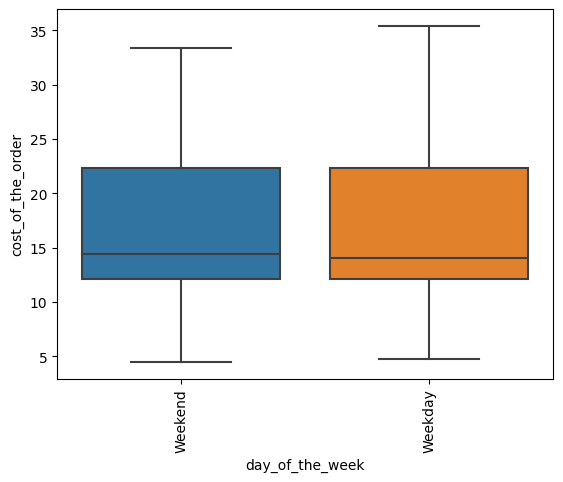

In [ ]:
# box plot of cost_of_the_order for weekend and weekdays
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

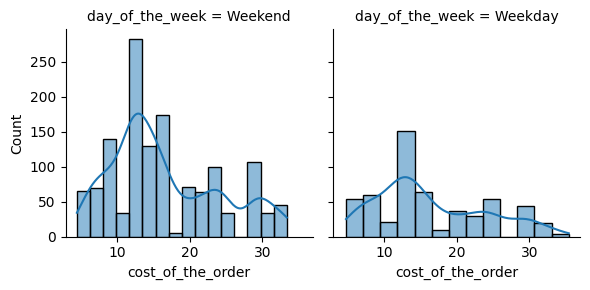

In [ ]:
# histogram plot of cost_of_the_order for weekend and weekdays
g = sns.FacetGrid(df, col="day_of_the_week")
g.map(sns.histplot, "cost_of_the_order", kde=True);
plt.show()

#### Observations
*   There is no significant difference in the cost of the order between weekdays and weekends
*   The median cost of the order for weekdays and weekends is aproximately 14 dollars.



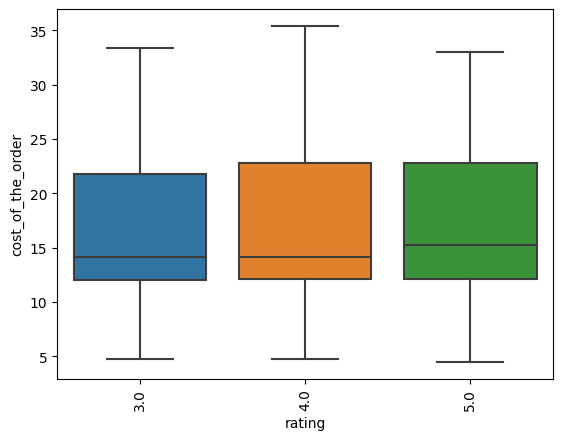

In [ ]:
# box plot of cost_of_the_order for the different ratings
sns.boxplot(data=df,x='rating',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

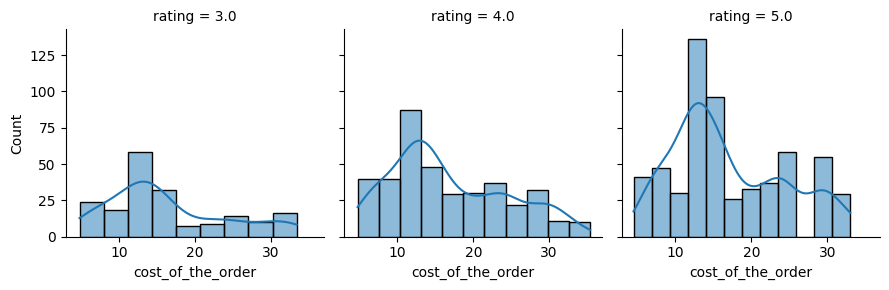

In [ ]:
# histogram plot of cost_of_the_order for the different ratings
g = sns.FacetGrid(df, col="rating")
g.map(sns.histplot, "cost_of_the_order", kde=True);
plt.show()

#### Observations
The cost of the order is not a major determinent of customer rating

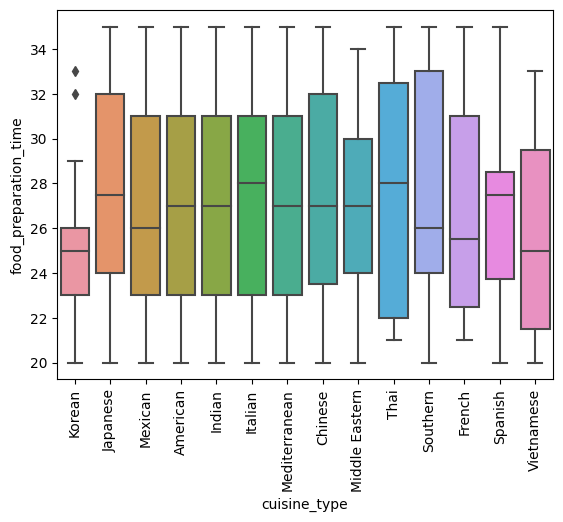

In [ ]:
# box plot of food_preparation_time for the different cuisine types
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

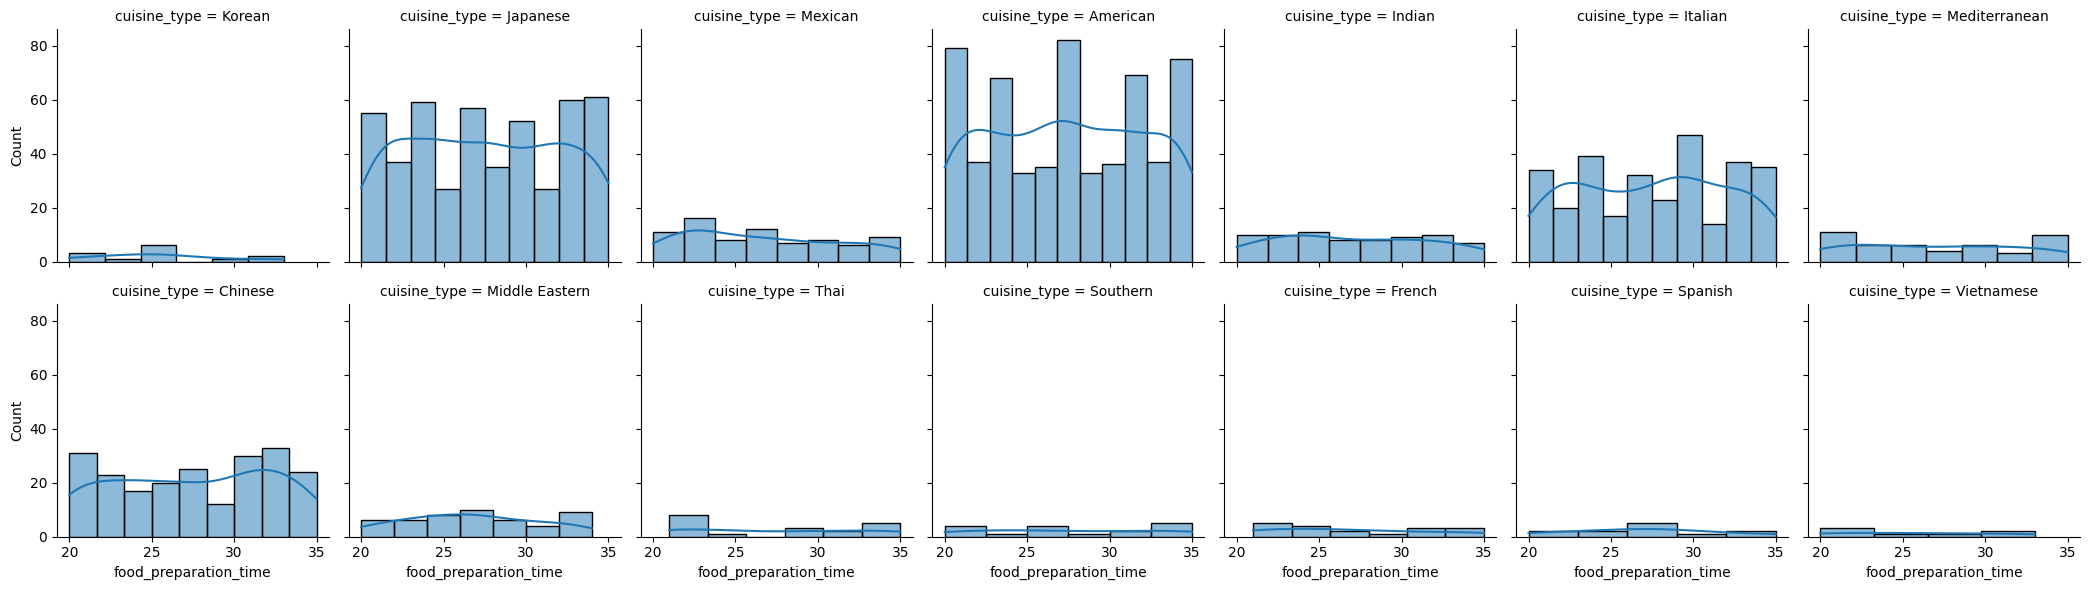

In [ ]:
# histogram plot of food_preparation_time for the different cuisine types
g = sns.FacetGrid(df, col="cuisine_type", col_wrap=7)
g.map(sns.histplot, "food_preparation_time", kde=True);
plt.show()

#### Observations
*   The cost of the order is not a significant determinent of food preparation time
*   Korean and Vietnamese have the lowest median food preparation time
*   Italian, Thai and Spanish have the highest median food preparation time


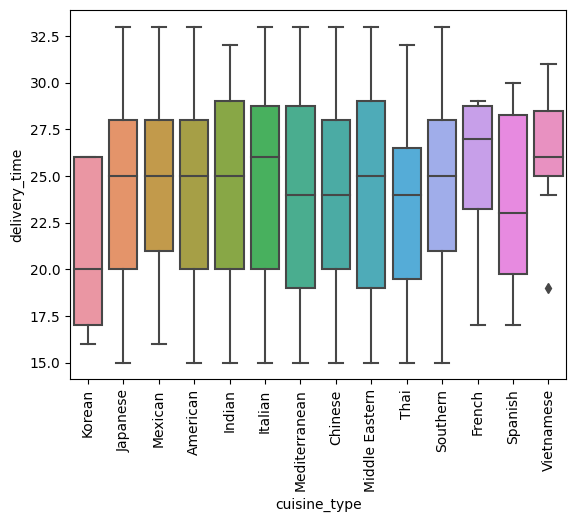

In [ ]:
# box plot of delivery_time for the different cuisine types
sns.boxplot(data=df,x='cuisine_type',y='delivery_time')
plt.xticks(rotation=90)
plt.show()

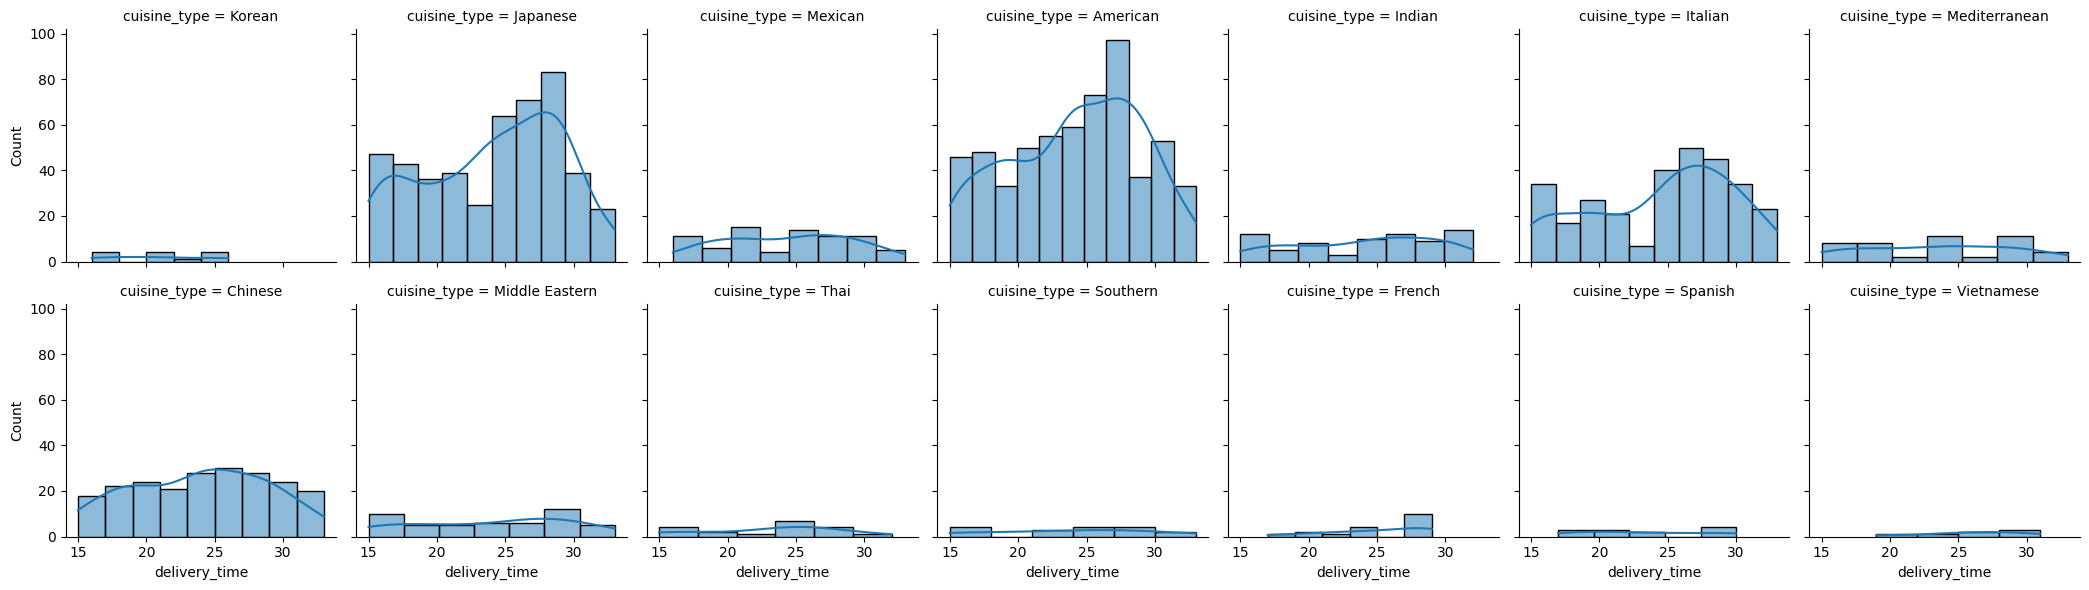

In [ ]:
# histogram plot of delivery_time for the different cuisine types
g = sns.FacetGrid(df, col="cuisine_type", col_wrap=7)
g.map(sns.histplot, "delivery_time", kde=True);
plt.show()

In [ ]:
# compute the number of restaurants that serve each cuisine type
df.groupby('cuisine_type')['restaurant_name'].nunique()

cuisine_type
American          41
Chinese           16
French             3
Indian            14
Italian           31
Japanese          29
Korean             5
Mediterranean      5
Mexican           11
Middle Eastern     7
Southern           2
Spanish            3
Thai               9
Vietnamese         3
Name: restaurant_name, dtype: int64

####Observations:
*   The least pouplar cuisines Vietnamese, Spanish and Korean have very less restautants sevring that cuisine type
*   The most popular cuisine type, "American" has the highest number of restautants serving the cuisine type.



#### Observations
*   The minimum delivery time for Vietnamese (24) is really high compared to the minimum delivery time for other cuisines.
*   The median delivery time for Korean (20) is really low compared to the other cuisines.




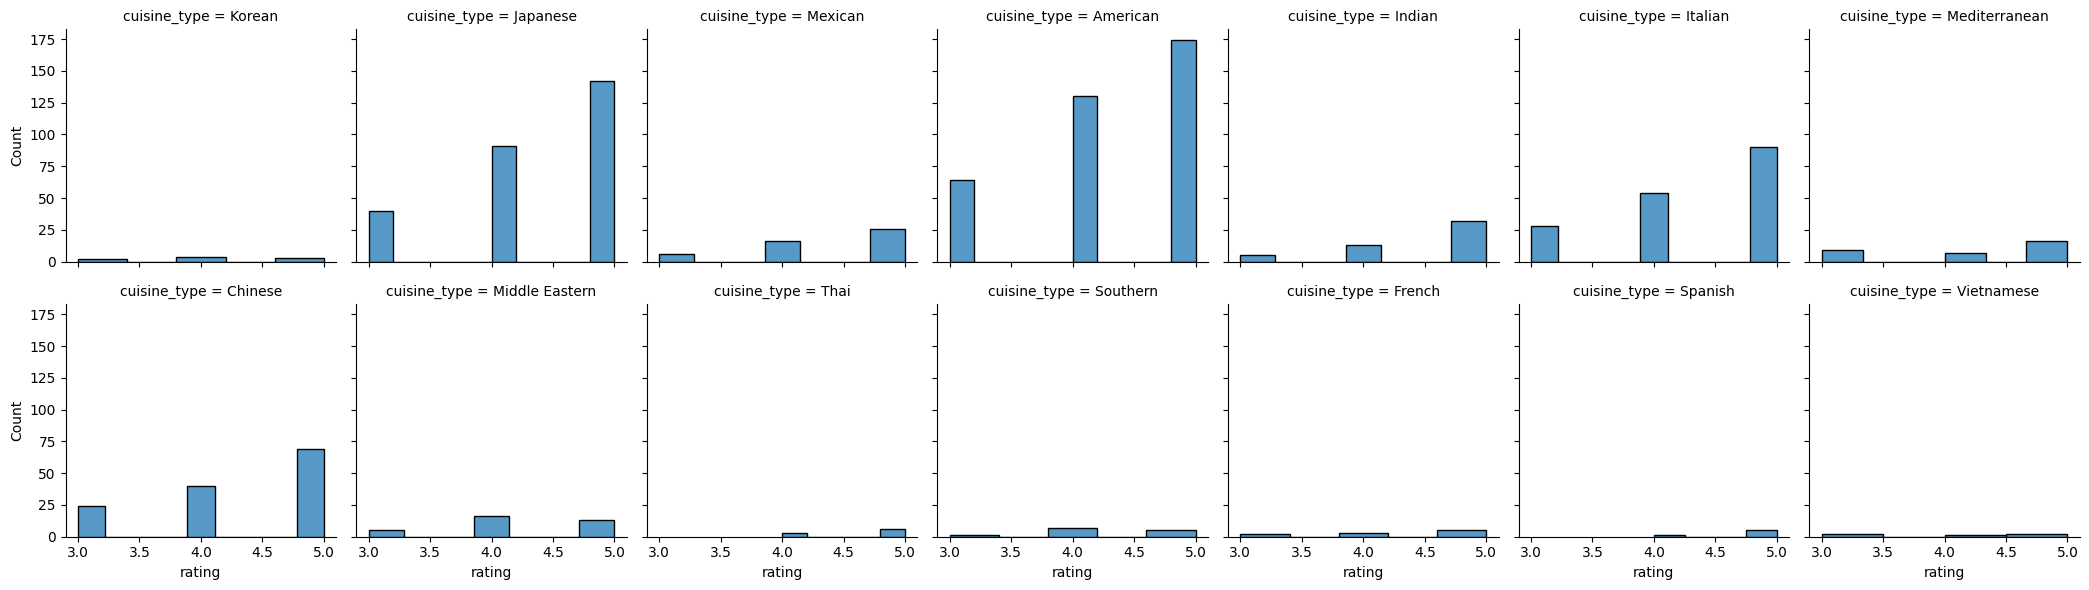

In [ ]:
# histplot of ratings for various cuisine types
g = sns.FacetGrid(data=df, col='cuisine_type', col_wrap=7)
g.map(sns.histplot, "rating")
plt.show()

#### Observations:
*   Cuisine type does not have a significant impact on the patterns of customer rating.



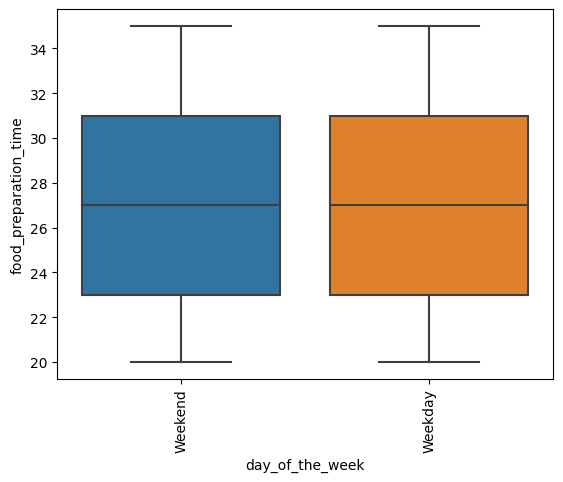

In [ ]:
# box plot for food preparation time on weekends and weekdays
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

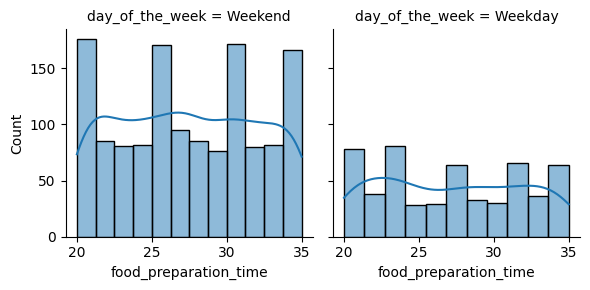

In [ ]:
# histogram plot for food preparation time on weekends and weekdays
g = sns.FacetGrid(df, col="day_of_the_week")
g.map(sns.histplot, "food_preparation_time", kde=True);
plt.show()

#### Observations
*   Food prepration time does not vary significantly between weekdays and weekends
*   The median food preparation time is approximately 27 minutes



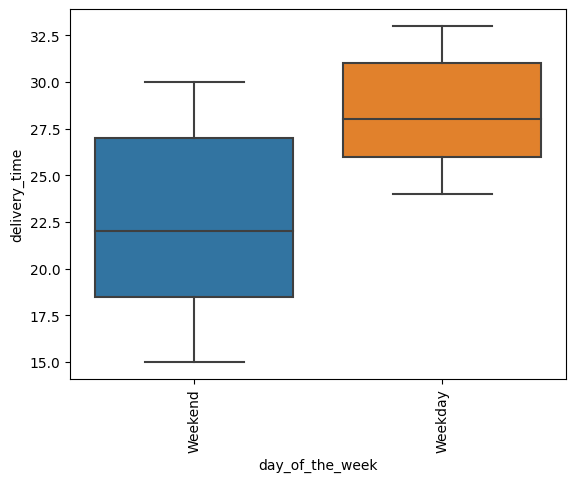

In [ ]:
# box plot for delivery time on weekend and wekkdays
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.xticks(rotation=90)
plt.show()

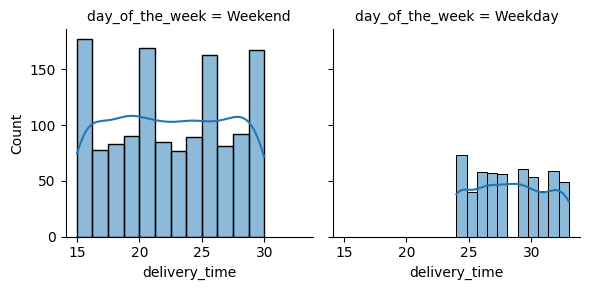

In [ ]:
# histogram plot for delivery time on weekend and wekkdays
g = sns.FacetGrid(df, col="day_of_the_week")
g.map(sns.histplot, "delivery_time", kde=True);
plt.show()

#### Observations
*   Delivery times are significatnly higher on weekdays as compared to weekends, most likely due to the higher traffic on weekdays
*   The minimum delivery time on a weekend in 15 minutes where as the minimum delivery time on a week day is approximately 24 minutes
* The median delivery time for weekdays is approximately 28 minutes whereas that for the weekend is approximately 22 minutes




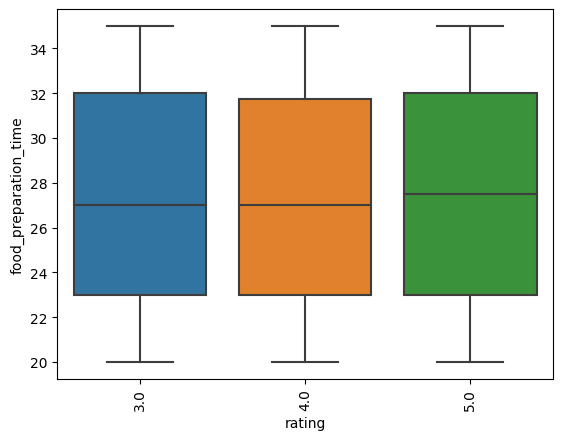

In [ ]:
# box plot for food preparation time for various customer ratings
sns.boxplot(data=df,x='rating',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

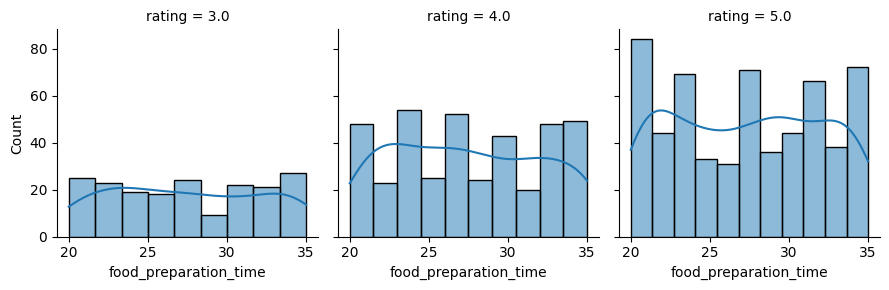

In [ ]:
# histogram plot for food preparation time for various customer ratings
g = sns.FacetGrid(df, col="rating")
g.map(sns.histplot, "food_preparation_time", kde=True);
plt.show()

#### Observations
*   The food preparation time has no sinificant impact on customer rating
*   The median food preparation time is approximately 27 dollars.

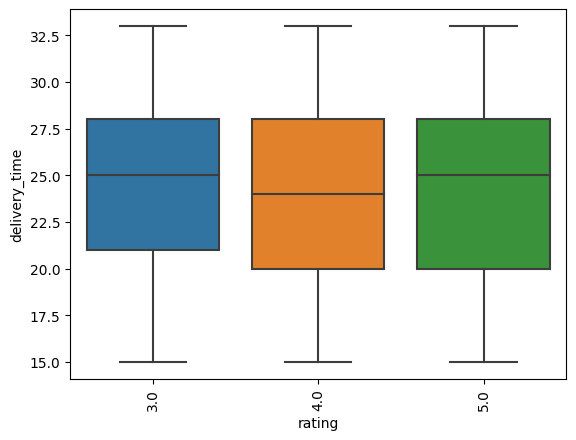

In [ ]:
# box plot for delivery_time for each customer rating catagory
sns.boxplot(data=df,x='rating',y='delivery_time')
plt.xticks(rotation=90)
plt.show()

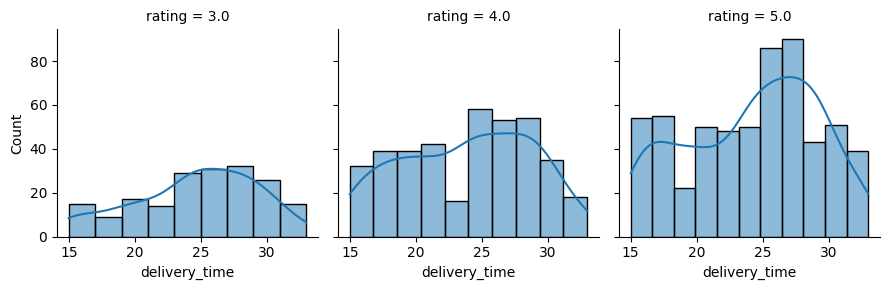

In [ ]:
# histogram plot for delivery_time for each customer rating catagory
g = sns.FacetGrid(df, col="rating")
g.map(sns.histplot, "delivery_time", kde=True);
plt.show()

#### Observation
Delivery time does not have a significant impact on customer rating.

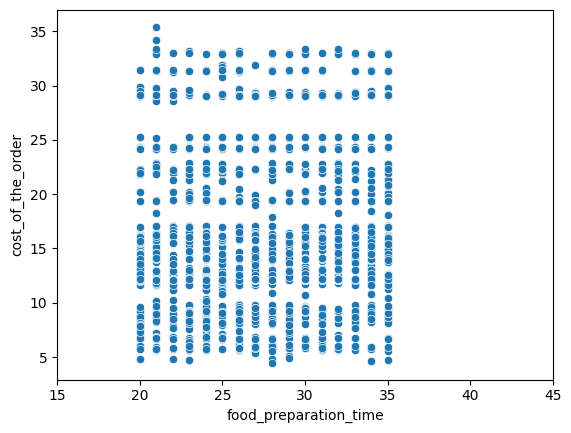

In [ ]:
# scatterplot for food perparation time and cost of the order
sns.scatterplot(data=df,x='food_preparation_time',y='cost_of_the_order')
plt.xlim(15,45)
plt.show()

#### Observations
Cost of the order does not have any correlation with food preparation time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Use group by on restaurant name and find the mean rating and rating count
grouped_data = df.groupby('restaurant_name').agg(
    rating_mean=('rating', np.mean),
    rating_count=('rating', np.count_nonzero))
# filter the resulting data frame baesd on the cirterta - "rating count more than 50 and average rating greater than 4"
grouped_data[(grouped_data['rating_count'] > 50) & (grouped_data['rating_count'] > 4)]

,rating_mean,rating_count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,96
Blue Ribbon Sushi,4.219178,119
Parm,4.128205,68
RedFarm Broadway,4.243902,59
RedFarm Hudson,4.176471,55
Shake Shack,4.278195,219
The Meatball Shop,4.511905,132


#### Observations:
The restaurants that receive the promotional offer are Blue Ribbon Fried Chicked, Blue Ribbon Sushie, Parm, RedFarm Broadway, RedFarm Hudson, Shake Shack and The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# function to calculate the company earning for an order based on the cost of the order
def calculate_earnings_on_order(data_row):
  if data_row['cost_of_the_order'] <= 5:
    return 0
  elif data_row['cost_of_the_order'] <= 20:
    return 0.15 * data_row['cost_of_the_order']
  else:
    return 0.25 * data_row['cost_of_the_order']

# add the "earnings on order" column to the data frame by using "apply" and the function defined above
# Reference: https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/
df['earnings_on_order'] = df.apply(lambda data_row: calculate_earnings_on_order(data_row), axis=1)

# Find the sum of all values in "earnings_on_order"
df['earnings_on_order'].sum()

6166.303

#### Observations:
The net revenue generated by the company across all orders is dollars 6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# function to calculate the total time to deliver based on the food preparation time and the delivery time
def calculate_total_time_to_deliver(data_row):
  return data_row['food_preparation_time'] + data_row['delivery_time']

# add the "total_time_to_deliver" column to the data frame by using "apply" and the function defined above
df['total_time_to_deliver'] = df.apply(lambda data_row: calculate_total_time_to_deliver(data_row), axis=1)

# find the number of orders that take more than 60 minutes to be delivered from the time its ordered and then calculate the percentage
(df[(df['total_time_to_deliver']>60)].shape[0]/df.shape[0]) * 100

10.537407797681771

#### Observations:
10.5% of the orders take more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# group the data by "day_of_the_week" and calculate the mean of delivery_time
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time on weekdays is 28.34 minutes and the mean delivery time on weekends is 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The most preferred cuisines are American, Japanese, Italian and Chinese
*  The least preferred cuisine types are Korean, Spanish and Vietnamese
*  Weekend orders are more than double that of weekdays
*  Delivery times on weekdays are really high compared to the delivery times on weekends
*  Vietnamese cusine type has relatively longer delivery times compared to other cuisine types due to the fact that there are very few restaurants serving that cuisine type.
*  The analysis failed to show that Preparation time and Delivery time are significantly influencing customer ratings.




### Recommendations:
*  It will serve well to focus on the most popular cuisines (American, Japanese, Italian and Chinese) and find oppourtunities to expand business to more restaurants that serve these cuisines
*  It is advisable to focus on orders over the weekend as this is where majority of the revenue is coming from. Special price deals on the weekends and focusing on efforts to reduce the delivery time on weekends could result in improved customer ratings and higher revenue.
*  There are very few restautants serving the least popular cusine types. The company can potentially explore opportunities to associate with more of these restaurants to see if they will generate more revenue than before.





:---